# 전처리
이미지데이터 개수 확인

In [1]:
import os
import torch
import cv2
train_dir = 'sushi_crop_data_update\\train'
test_dir = 'sushi_crop_data_update\\test'
val_dir = 'sushi_crop_data_update\\valid'
trainset_dir = os.listdir(train_dir)
testset_dir = os.listdir(test_dir)
valset_dir = os.listdir(val_dir)
cnt = 0
for d in trainset_dir:
    cnt += len(os.listdir(os.path.join(train_dir, d)))
print('trainset length:', cnt)
cnt = 0
for d in valset_dir:
    cnt += len(os.listdir(os.path.join(val_dir, d)))
print('valset length:', cnt)
cnt = 0
for d in testset_dir:
    cnt += len(os.listdir(os.path.join(test_dir, d)))
print('testset length:', cnt)#6294 1424 more crawled

trainset length: 5373
valset length: 578
testset length: 343


클래수 개수 및 이미지 경로 확인

In [2]:
classes = os.listdir(train_dir)

print(classes)

train_dirs = []
test_dirs = []
val_dirs = []

for i in classes:
  train_dirs.append(os.path.join(train_dir, i))
  test_dirs.append(os.path.join(test_dir, i))
  val_dirs.append(os.path.join(val_dir, i))

print(train_dirs)
print(test_dirs)
print(val_dirs)

['arctic_surf_clam', 'capelin_roe', 'crab_meat', 'flatfish', 'fried_tofu_poouch', 'futomaki', 'octopus', 'salmon', 'shrimp', 'tamagoyaki', 'tilapia', 'tuna']
['sushi_crop_data_update\\train\\arctic_surf_clam', 'sushi_crop_data_update\\train\\capelin_roe', 'sushi_crop_data_update\\train\\crab_meat', 'sushi_crop_data_update\\train\\flatfish', 'sushi_crop_data_update\\train\\fried_tofu_poouch', 'sushi_crop_data_update\\train\\futomaki', 'sushi_crop_data_update\\train\\octopus', 'sushi_crop_data_update\\train\\salmon', 'sushi_crop_data_update\\train\\shrimp', 'sushi_crop_data_update\\train\\tamagoyaki', 'sushi_crop_data_update\\train\\tilapia', 'sushi_crop_data_update\\train\\tuna']
['sushi_crop_data_update\\test\\arctic_surf_clam', 'sushi_crop_data_update\\test\\capelin_roe', 'sushi_crop_data_update\\test\\crab_meat', 'sushi_crop_data_update\\test\\flatfish', 'sushi_crop_data_update\\test\\fried_tofu_poouch', 'sushi_crop_data_update\\test\\futomaki', 'sushi_crop_data_update\\test\\octopus

이미지 시각화

['arctic_surf_clam_1.jpg', 'arctic_surf_clam_1005.jpg', 'arctic_surf_clam_1023.jpg', 'arctic_surf_clam_1057.jpg', 'arctic_surf_clam_1073.jpg', 'arctic_surf_clam_1082.jpg', 'arctic_surf_clam_1083.jpg', 'arctic_surf_clam_1104.jpg', 'arctic_surf_clam_1110.jpg', 'arctic_surf_clam_1115.jpg']
['104.jpg', '107.jpg', '108.jpg', '11.jpg', '111.jpg', '11_.jpg', '12_.jpg', '13_.jpg', '15.jpg', '15_.jpg']


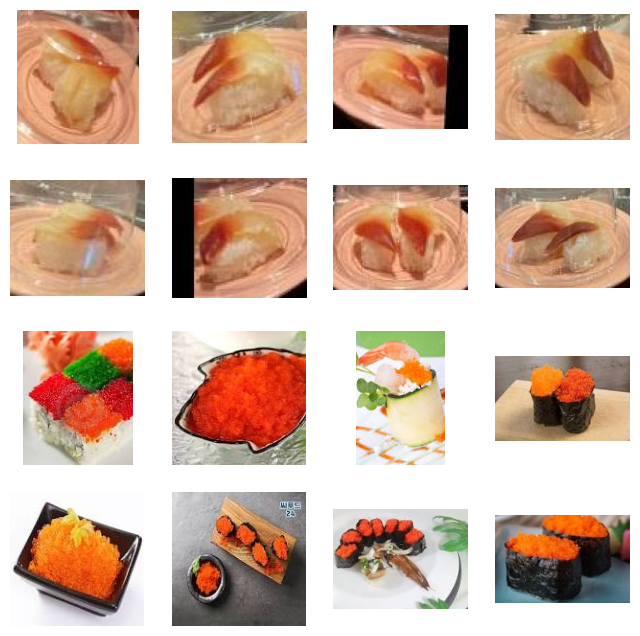

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_octopus_fnames = os.listdir(train_dirs[0])
print(train_octopus_fnames[:10])

train_crab_meat_fnames = os.listdir(train_dirs[1])
train_crab_meat_fnames.sort()
print(train_crab_meat_fnames[:10])

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)\

pic_index += 8

next_octopus_pix = [os.path.join(train_dirs[0], fname)
                for fname in train_octopus_fnames[pic_index-8:pic_index]]
next_crab_meat_pix = [os.path.join(train_dirs[1], fname)
                for fname in train_crab_meat_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_octopus_pix+next_crab_meat_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [1]:
import os
import torch
from torchvision import datasets, transforms, models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# 사용자 정의 노이즈 추가 함수
class AddGaussianNoise(object):
    def __init__(self, mean=0.0, std=1.0):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'
    
# 데이터 전처리
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        # transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
        transforms.ToTensor(),
        # AddGaussianNoise(0.0, 0.1),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# 데이터셋 경로 설정
data_dir = 'sushi_crop_data_update'
assert os.path.exists(data_dir), f"{data_dir} 경로가 존재하지 않습니다."

image_datasets = {
    'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transforms['train']),
    'valid': datasets.ImageFolder(os.path.join(data_dir, 'valid'), data_transforms['valid']),
    'test': datasets.ImageFolder(os.path.join(data_dir, 'test'), data_transforms['test'])
}

dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=16, shuffle=True, num_workers=4),
    'valid': DataLoader(image_datasets['valid'], batch_size=32, shuffle=True, num_workers=4),
    'test': DataLoader(image_datasets['test'], batch_size=32, shuffle=False, num_workers=4)
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}
class_names = image_datasets['train'].classes

print(f"클래스: {class_names}")
print(f"훈련 데이터셋 크기: {dataset_sizes['train']}")
print(f"검증 데이터셋 크기: {dataset_sizes['valid']}")
print(f"테스트 데이터셋 크기: {dataset_sizes['test']}")


클래스: ['arctic_surf_clam', 'capelin_roe', 'crab_meat', 'flatfish', 'fried_tofu_poouch', 'futomaki', 'octopus', 'salmon', 'shrimp', 'tamagoyaki', 'tilapia', 'tuna']
훈련 데이터셋 크기: 5370
검증 데이터셋 크기: 578
테스트 데이터셋 크기: 343


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device: ',device)
# 모델 불러오기 및 수정
# Resnet50
# model_ft = models.resnet50(pretrained=True)
# num_ftrs = model_ft.fc.in_features
# model_ft.fc = nn.Linear(num_ftrs, len(class_names))

# VGG16
# model_ft = models.vgg16(pretrained=True)
# num_ftrs = model_ft.classifier[6].in_features
# model_ft.classifier[6] = nn.Linear(num_ftrs, len(class_names))

# Alexnet
# model_ft = models.alexnet(pretrained=True)
# num_ftrs = model_ft.classifier[6].in_features
# model_ft.classifier[6] = nn.Linear(num_ftrs, len(class_names))

# Convnext M
model_ft = models.convnext_base(pretrained=True)
num_ftrs = model_ft.classifier[2].in_features
model_ft.classifier[2] = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# 모든 파라미터가 학습 가능하도록 설정
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0001)


device:  cuda:0


Downloading: "https://download.pytorch.org/models/convnext_base-6075fbad.pth" to C:\Users\khsfu/.cache\torch\hub\checkpoints\convnext_base-6075fbad.pth
100%|██████████| 338M/338M [06:23<00:00, 925kB/s]  


In [4]:
import copy
from tqdm import tqdm


def train_model(model, criterion, optimizer, num_epochs=10):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_acc_epoch= 0
    best_loss = float('inf')
    best_epoch = 0
    history = {'train_loss': [], 'valid_loss': [], 'train_acc': [], 'valid_acc': []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # 각 epoch마다 훈련 및 검증 단계
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # 모델을 훈련 모드로 설정
            else:
                model.eval()  # 모델을 평가 모드로 설정

            running_loss = 0.0
            running_corrects = 0

            # tqdm을 사용하여 데이터 반복 진행 상황 표시
            for inputs, labels in tqdm(dataloaders[phase], desc=f"{phase} phase"):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # 파라미터 경사도를 0으로 설정
                optimizer.zero_grad()

                # 순전파
                # 훈련일 때만 역전파 수행
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # 훈련 단계에서만 역전파 + 최적화 수행
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # 통계 업데이트
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')


            # 모델을 deep copy 함
            if phase == 'valid' and epoch_loss < best_loss:
                best_loss = epoch_loss
                best_epoch = epoch
                best_model_wts = model.state_dict()
                torch.save(best_model_wts, f'models/sushiupdate_classifier_convnextB_10_{best_epoch}.pth')
                print(f'Saved best model at epoch {best_epoch} with loss: {best_loss:.4f}')

                # best_model_wts = copy.deepcopy(model.state_dict())

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_acc_epoch = epoch

                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    print(f'Best val Acc: {best_acc:4f} at epoch {best_acc_epoch}')
    print(f'Best validation loss: {best_loss:.4f} at epoch {best_epoch}')

    # 가장 나은 모델 가중치를 불러옴
    model.load_state_dict(best_model_wts)
    return model, history



In [5]:
model_ft, history = train_model(model_ft, criterion, optimizer_ft, num_epochs=10)
torch.save(model_ft.state_dict(), 'models/sushiupdate_classifier_convnextB_10.pth')

Epoch 0/9
----------


train phase: 100%|██████████| 336/336 [03:17<00:00,  1.70it/s]


train Loss: 0.5539 Acc: 0.8443


valid phase: 100%|██████████| 19/19 [00:10<00:00,  1.89it/s]


valid Loss: 0.4337 Acc: 0.9014
Saved best model at epoch 0 with loss: 0.4337

Epoch 1/9
----------


train phase: 100%|██████████| 336/336 [03:16<00:00,  1.71it/s]


train Loss: 0.2445 Acc: 0.9261


valid phase: 100%|██████████| 19/19 [00:08<00:00,  2.12it/s]


valid Loss: 0.4308 Acc: 0.8875
Saved best model at epoch 1 with loss: 0.4308

Epoch 2/9
----------


train phase: 100%|██████████| 336/336 [03:16<00:00,  1.71it/s]


train Loss: 0.2111 Acc: 0.9294


valid phase: 100%|██████████| 19/19 [00:08<00:00,  2.17it/s]


valid Loss: 0.4185 Acc: 0.9100
Saved best model at epoch 2 with loss: 0.4185

Epoch 3/9
----------


train phase: 100%|██████████| 336/336 [03:16<00:00,  1.71it/s]


train Loss: 0.1729 Acc: 0.9443


valid phase: 100%|██████████| 19/19 [00:09<00:00,  2.10it/s]


valid Loss: 0.4212 Acc: 0.9170

Epoch 4/9
----------


train phase: 100%|██████████| 336/336 [03:12<00:00,  1.75it/s]


train Loss: 0.1584 Acc: 0.9486


valid phase: 100%|██████████| 19/19 [00:08<00:00,  2.13it/s]


valid Loss: 0.4214 Acc: 0.9118

Epoch 5/9
----------


train phase: 100%|██████████| 336/336 [03:16<00:00,  1.71it/s]


train Loss: 0.1449 Acc: 0.9466


valid phase: 100%|██████████| 19/19 [00:08<00:00,  2.12it/s]


valid Loss: 0.4545 Acc: 0.9221

Epoch 6/9
----------


train phase: 100%|██████████| 336/336 [03:15<00:00,  1.72it/s]


train Loss: 0.1469 Acc: 0.9525


valid phase: 100%|██████████| 19/19 [00:08<00:00,  2.13it/s]


valid Loss: 0.5158 Acc: 0.8997

Epoch 7/9
----------


train phase: 100%|██████████| 336/336 [03:17<00:00,  1.70it/s]


train Loss: 0.1344 Acc: 0.9542


valid phase: 100%|██████████| 19/19 [00:08<00:00,  2.12it/s]


valid Loss: 0.4909 Acc: 0.8979

Epoch 8/9
----------


train phase: 100%|██████████| 336/336 [03:17<00:00,  1.70it/s]


train Loss: 0.1231 Acc: 0.9564


valid phase: 100%|██████████| 19/19 [00:09<00:00,  2.09it/s]


valid Loss: 0.4896 Acc: 0.9187

Epoch 9/9
----------


train phase: 100%|██████████| 336/336 [03:17<00:00,  1.70it/s]


train Loss: 0.1312 Acc: 0.9529


valid phase: 100%|██████████| 19/19 [00:09<00:00,  2.08it/s]


valid Loss: 0.4943 Acc: 0.9118

Best val Acc: 0.922145 at epoch 5
Best validation loss: 0.4185 at epoch 2


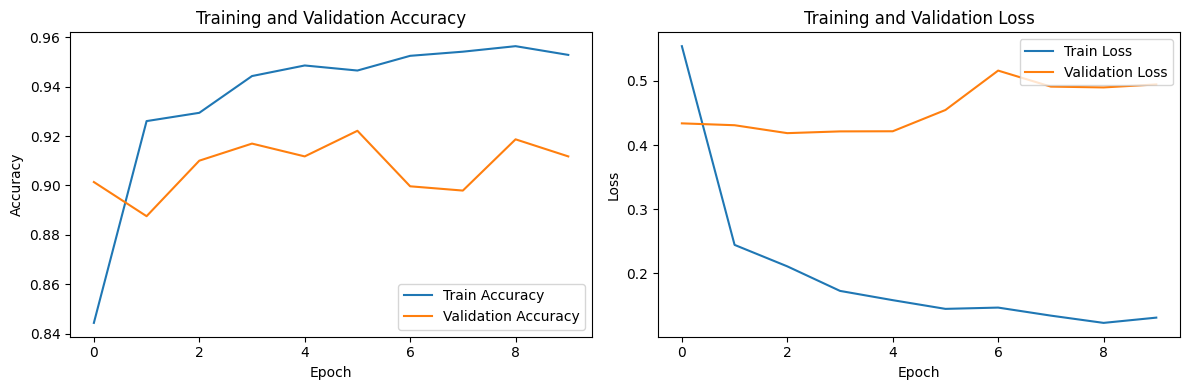

In [6]:
import matplotlib.pyplot as plt

# 훈련 및 검증 정확도 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['valid_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# 훈련 및 검증 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['valid_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


In [7]:
from sklearn.metrics import f1_score

# F1 스코어 계산 함수
def calculate_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted')

def evaluate_model(model, dataloader, dataset_size):
    model.eval()   # 모델을 평가 모드로 설정
    running_corrects = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = running_corrects.double() / dataset_size
    f1 = calculate_f1_score(all_labels, all_preds)
    
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Test F1 Score: {f1:.4f}')

# 예제 사용법
# Assume `model_ft` is your trained model and `dataloaders['test']` is your test DataLoader
dataset_size = len(dataloaders['test'].dataset)
evaluate_model(model_ft, dataloaders['test'], dataset_size)

Test Accuracy: 0.9125
Test F1 Score: 0.9120


: 

In [ ]:
def evaluate_model(model, dataloader):
    model.eval()   # 모델을 평가 모드로 설정
    running_corrects = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

    accuracy = running_corrects.double() / dataset_sizes['test']
    print(f'Test Accuracy: {accuracy:.4f}')

evaluate_model(model_ft, dataloaders['test'])
